In [324]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pickle
import os
import math

## Ground/source referenced XOR problem

problem parameters:

In [325]:
# load data
xor_data = np.load(os.path.join("data", "xor_train_data.npz"))
train_inputs = xor_data["inputs"]
train_outputs = xor_data["outputs"]

In [257]:
# constants
I_pos = 0.33
I_neg = 0.11
I_0 = 0.45
L_0 = -0.087

In [258]:
eta = 0.5
gamma = 0.1 * 1/eta
total_epochs = 100000
checkpoints = 15
epochs = int(math.ceil(total_epochs / checkpoints)) # train this many steps before checkpointing
log_steps = epochs // 10

In [259]:
# compute steps per run where loggin is done
log_pts = [0] + [i+1 for i in range(epochs) if (i % log_steps) == 0]
log_pts_all = np.concatenate([[i*epochs + j for j in log_pts] for i in range(checkpoints)])

source_reference_xor took 9575.356634140015 seconds (~2.66 hours)

In [331]:
source_xor = pickle.load(open('checkpoints/source_reference_xor2_19.pkl', 'rb'))

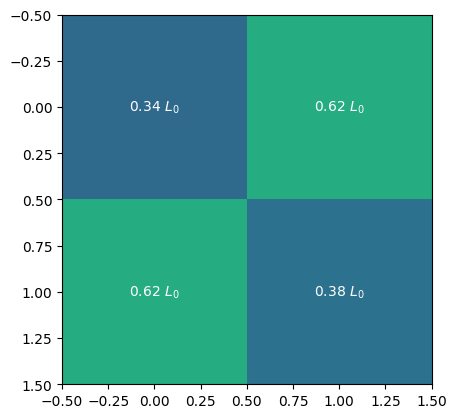

In [332]:
k = 0
plt.imshow(source_xor['intermediate_preds'][k].reshape(2, 2) / L_0, vmin=0, vmax=1)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{source_xor['intermediate_preds'][k].reshape(2, 2)[i, j]/L_0:.2f} $L_0$", ha='center', va='center', color='white')

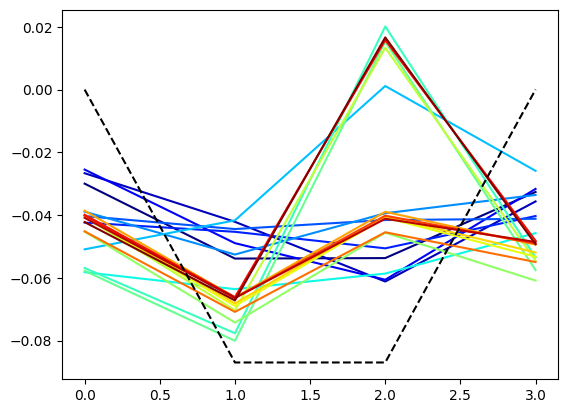

In [333]:
colors = plt.cm.jet(np.linspace(0,1,len(source_xor['intermediate_preds'])))


for i, pp in enumerate(source_xor['intermediate_preds']):
    plt.plot(pp, color=colors[i])
    
plt.plot(train_outputs, 'k--')

Text(0.5, 1.0, 'Training loss vs. iterations (source reference XOR)')

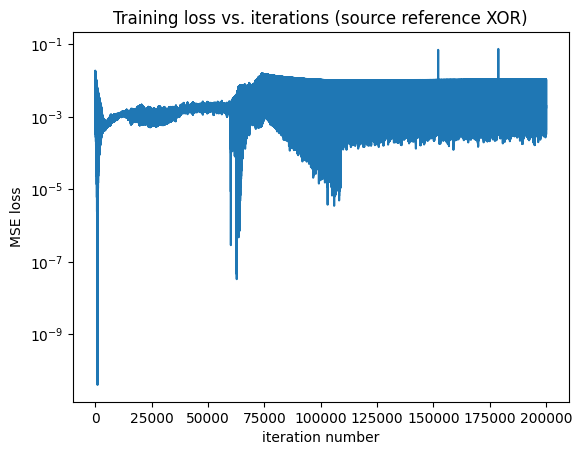

In [334]:
plt.plot(np.concatenate(source_xor['total_loss']))
plt.yscale('log')
plt.xlabel('iteration number')
plt.ylabel('MSE loss')
plt.title('Training loss vs. iterations (source reference XOR)')

ground_reference_xor took 9672.996715068817 seconds (~2.67 hours)

In [335]:
ground_xor = pickle.load(open('checkpoints/ground_reference_xor2_19.pkl', 'rb'))

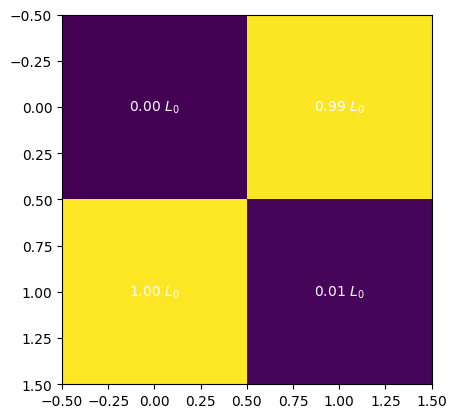

In [336]:
k = -1
plt.imshow(ground_xor['intermediate_preds'][k].reshape(2, 2) / L_0, vmin=0, vmax=1)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{ground_xor['intermediate_preds'][k].reshape(2, 2)[i, j]/L_0:.2f} $L_0$", ha='center', va='center', color='white')

Text(0.5, 1.0, 'Training loss vs. iterations (ground reference XOR)')

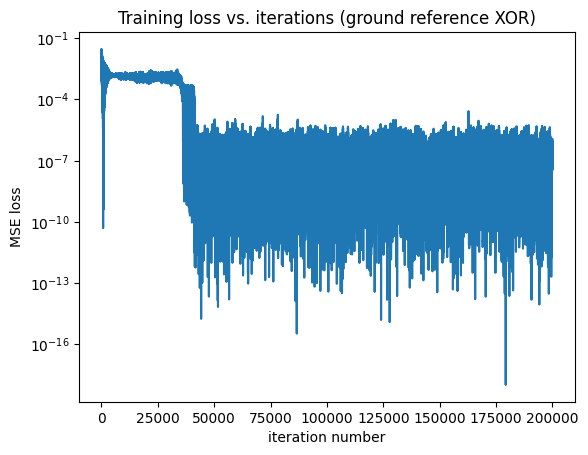

In [337]:
plt.plot(np.concatenate(ground_xor['total_loss']))
plt.yscale('log')
plt.xlabel('iteration number')
plt.ylabel('MSE loss')
plt.title('Training loss vs. iterations (ground reference XOR)')

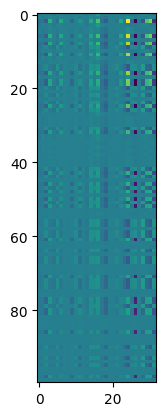

In [344]:
plt.imshow(np.concatenate(ground_xor['total_updates'])[:1000:10, :])

## Compare results

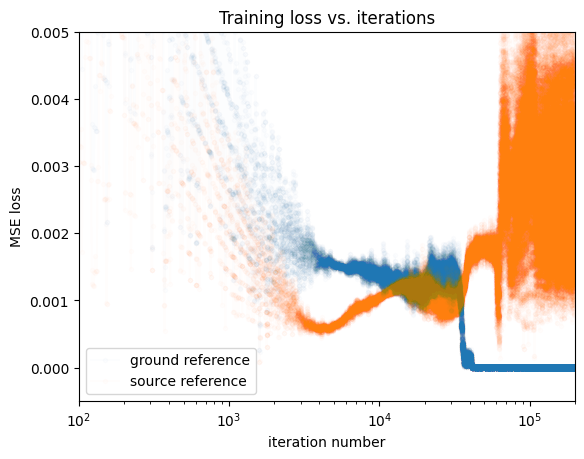

In [345]:
smoothing = 10

plt.plot(np.convolve(np.concatenate(ground_xor['total_loss']), np.ones(smoothing)/smoothing), '.-', label='ground reference', alpha=0.01)
plt.plot(np.convolve(np.concatenate(source_xor['total_loss']), np.ones(smoothing)/smoothing), '.-', label='source reference', alpha=0.01)
plt.xscale('log')
plt.xlabel('iteration number')
plt.ylabel('MSE loss')
plt.ylim(-5e-4, 5e-3)
plt.xlim(100, 200000)
plt.title('Training loss vs. iterations')
plt.legend()

In [346]:
# analyze nonlinear regression results

# load data
nonlinear_data = np.load("data/nonlinear_regression_data.npz")
train_inputs = nonlinear_data["inputs"]
train_outputs = nonlinear_data["outputs"]

source_nonlinear = pickle.load(open('checkpoints/source_reference_nonlinear2_19.pkl', 'rb'))
ground_nonlinear = pickle.load(open('checkpoints/ground_reference_nonlinear2_19.pkl', 'rb'))

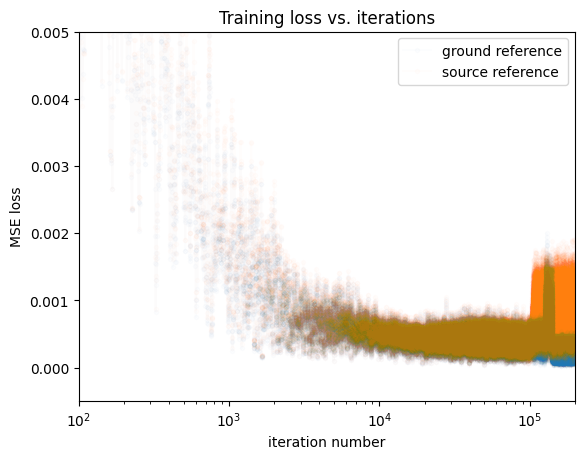

In [349]:
# plot the results
smoothing = 10

plt.plot(np.convolve(np.concatenate(ground_nonlinear['total_loss']), np.ones(smoothing)/smoothing), '.-', label='ground reference', alpha=0.01)
plt.plot(np.convolve(np.concatenate(source_nonlinear['total_loss']), np.ones(smoothing)/smoothing), '.-', label='source reference', alpha=0.01)
plt.xscale('log')
plt.xlabel('iteration number')
plt.ylabel('MSE loss')
plt.ylim(-5e-4, 5e-3)
plt.xlim(100, 200000)
plt.title('Training loss vs. iterations')
plt.legend()

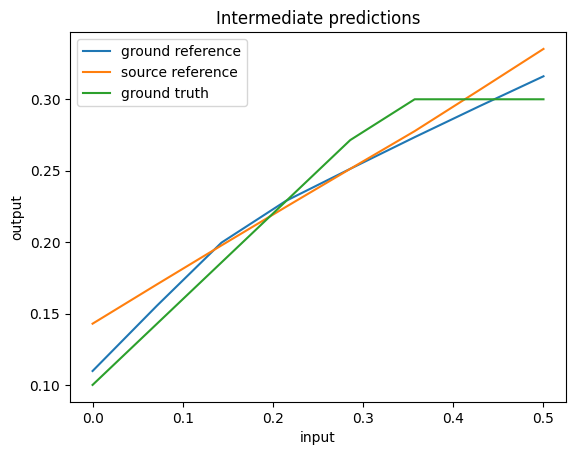

In [348]:
# plot intermediate predictions
k = -1
plt.plot(train_inputs[:,-1], ground_nonlinear['intermediate_preds'][k], label='ground reference')
plt.plot(train_inputs[:,-1], source_nonlinear['intermediate_preds'][k], label='source reference')
plt.plot(train_inputs[:,-1], train_outputs, label='ground truth')
plt.xlabel('input')
plt.ylabel('output')
plt.title('Intermediate predictions')
plt.legend()
